<a href="https://colab.research.google.com/github/ferreirabruno7/republicanas/blob/main/Laboratorio_Votos_Goais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão inicial de hipótese: O candidato que tem mais recursos para fazer campanha tem mais votos?

In [14]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import wooldridge as woo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pip install wooldridge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.2 MB/s 


In [24]:
#importacao de dados 
votos = pd.read_csv("https://raw.githubusercontent.com/ferreirabruno7/republicanas/main/prefeitos_goiais.csv", sep = ",", decimal=".")

In [25]:
votos

,NM_VOTAVEL,VR_RECEITA,DS_CARGO,QT_VOTOS,SG_PARTIDO
0,VANDERLAN VIEIRA CARDOSO,2751000.00,PREFEITO,398775,PSD
1,LUIZ ALBERTO MAGUITO VILELA,1569881.08,PREFEITO,494691,MDB
2,DIEGO VAZ SORGATTO,1360460.00,PREFEITO,48061,DEM
3,TALLES ALVES BARRETO,1196260.00,PREFEITO,5689,PSDB
4,ADIB ELIAS JUNIOR,1124780.00,PREFEITO,28984,PODE
...,...,...,...,...,...
778,JOÃO BATISTA DA SILVA,698.60,PREFEITO,19,PT
779,WILMAR FERREIRA DA SILVA,670.80,PREFEITO,1325,PODE
780,CARLOS DE SOUSA MIRANDA,500.00,PREFEITO,89,PSC
781,TACIMAR FERREIRA DE LIMA,441.95,PREFEITO,247,PMN


In [26]:
votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NM_VOTAVEL  783 non-null    object 
 1   VR_RECEITA  783 non-null    float64
 2   DS_CARGO    783 non-null    object 
 3   QT_VOTOS    783 non-null    int64  
 4   SG_PARTIDO  783 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 30.7+ KB


In [27]:
votos['VR_RECEITA'].fillna(int(votos['VR_RECEITA'].mean()), inplace=True)


In [28]:
#variables correlation 
crr = votos.corr()

Text(0.5, 1.0, 'Correlation')

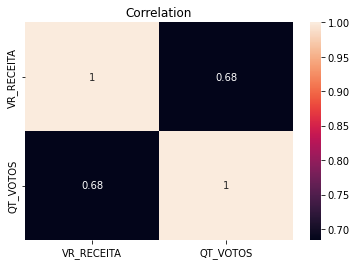

In [29]:
#correlation
sns.heatmap(crr, annot=True)
plt.title('Correlation')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


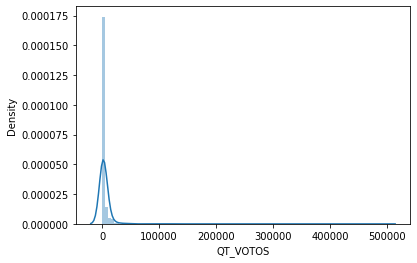

In [30]:
sns.distplot(votos['QT_VOTOS'], bins=100)


In [31]:
votos['QT_VOTOS'].mean()

4845.975734355045

In [32]:
votos['VR_RECEITA'].mean()

122063.3388505747

In [33]:
votos['VR_RECEITA'].max()

2751000.0

In [34]:
votos['VR_RECEITA'].min()

400.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


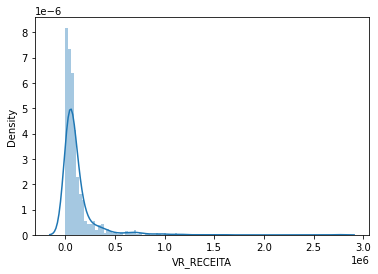

In [35]:
sns.distplot(votos['VR_RECEITA'], bins=100)


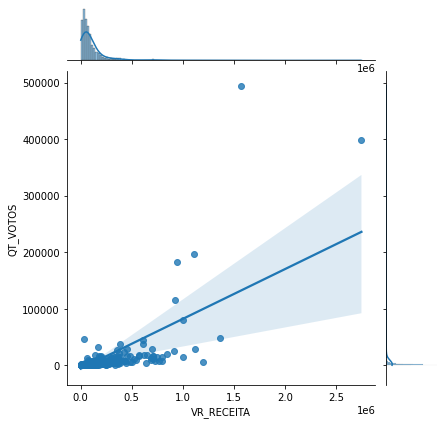

In [36]:
sns.jointplot(x='VR_RECEITA', y='QT_VOTOS', data=votos, kind='reg')


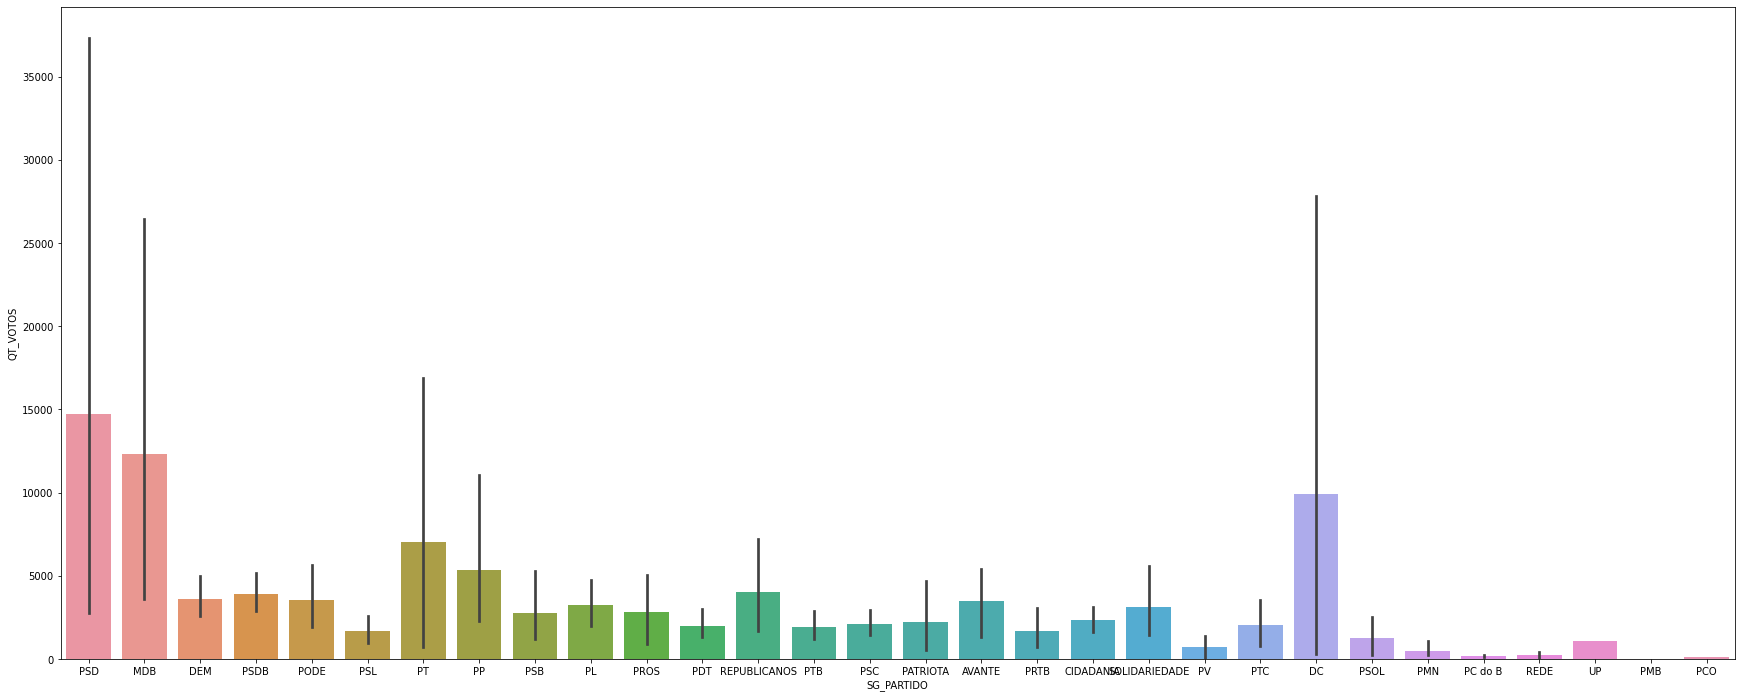

In [38]:
plt.figure(figsize=(30,12))
sns.barplot(x='SG_PARTIDO', y= 'QT_VOTOS', data=votos)

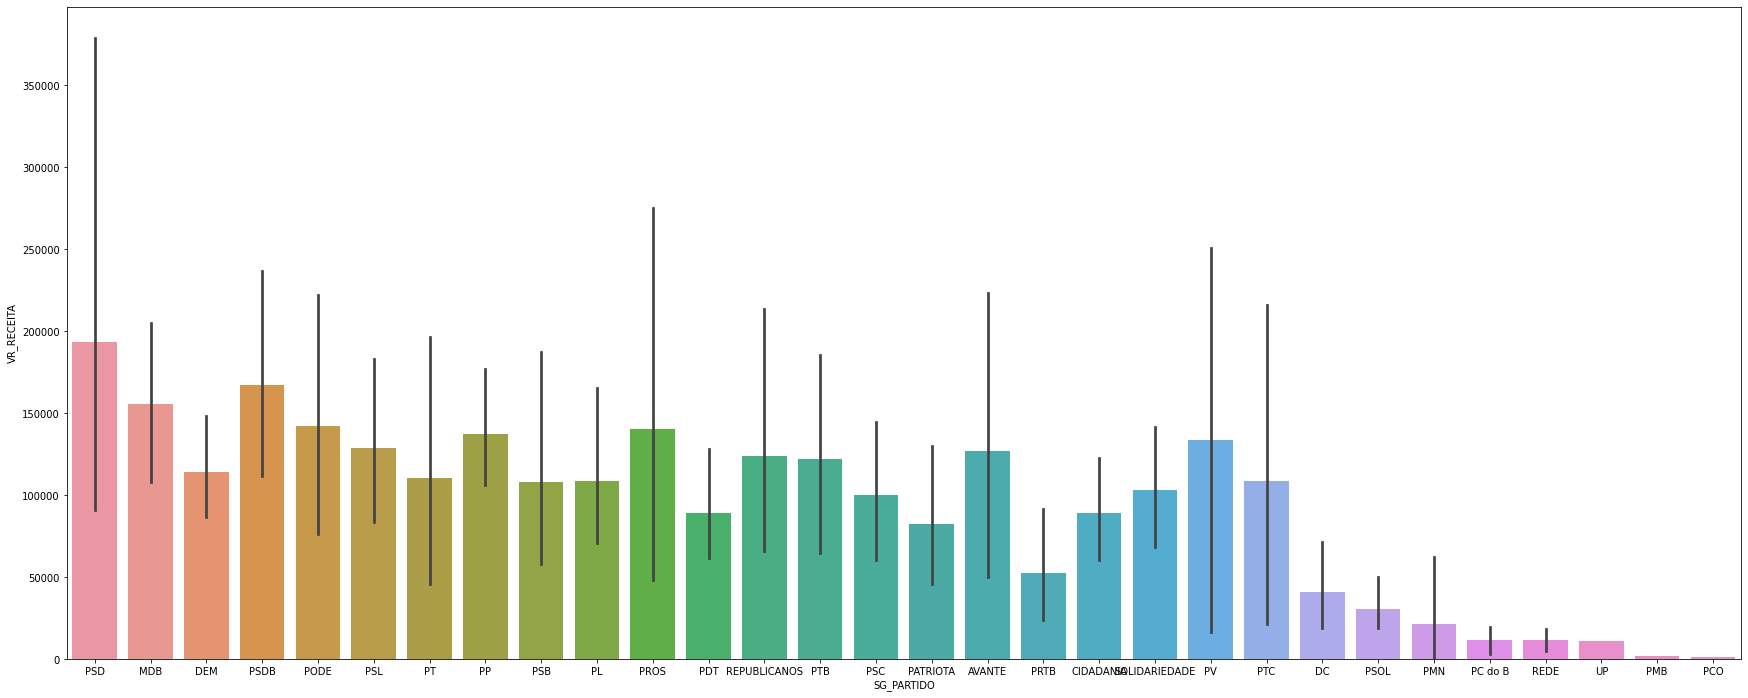

In [39]:
plt.figure(figsize=(30,12))
sns.barplot(x='SG_PARTIDO', y= 'VR_RECEITA', data=votos)

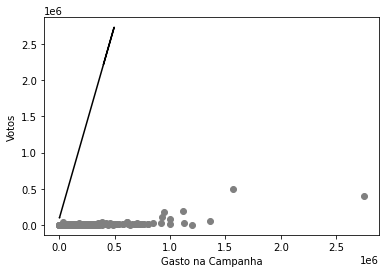

In [40]:
# Estimando o OLS:
reg = smf.ols(formula='VR_RECEITA ~ QT_VOTOS', data=votos)
results = reg.fit()
# dispersão:
plt.plot('VR_RECEITA', 'QT_VOTOS', data=votos, color='grey', marker='o', linestyle='')
plt.plot(votos['QT_VOTOS'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('Votos')
plt.xlabel('Gasto na Campanha');


In [41]:
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:             VR_RECEITA   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     687.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.47e-109
Time:                        22:13:45   Log-Likelihood:                -10412.
No. Observations:                 783   AIC:                         2.083e+04
Df Residuals:                     781   BIC:                         2.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.626e+04   5253.896

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
X = votos[['VR_RECEITA']]

In [44]:
y = votos['QT_VOTOS']

In [45]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,  test_size = 0.3, random_state= 42)

In [46]:
lr_model = LinearRegression(normalize=True)

In [47]:
#treinando o modelo de regressão
lr_model.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [48]:
#visualizando os coeficientes do modelo de regressão linear multipla
lr_model.coef_

array([0.10355387])

In [49]:
#representação dos coeficientes
coefs = pd.DataFrame(lr_model.coef_, X.columns, columns=['coefs'])
coefs

,coefs
VR_RECEITA,0.103554


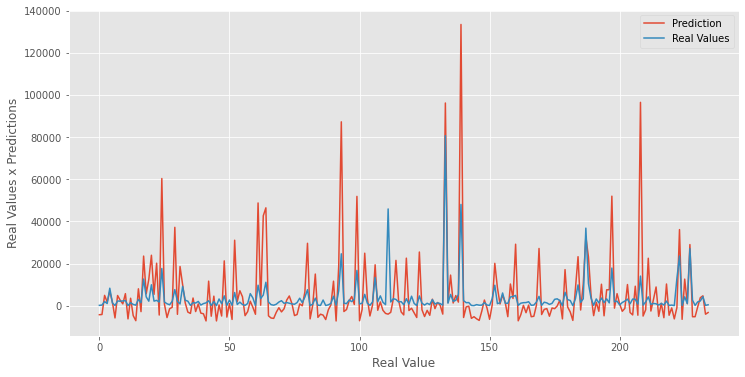

In [50]:
#aderencia entre o predito e treino, eixo x é o valor efetivo de votos e eixo Y o resultado dos testes
%matplotlib inline
predicoes = pd.DataFrame(lr_model.predict(X_teste))
y_teste = pd.DataFrame(y_teste.values)

plt.style.use("ggplot")
plt.figure(figsize=(12,6))
plt.xlabel('Real Value')
plt.ylabel('Predict Valeis')
plt.ylabel('Real Values x Predictions')
plt.plot(predicoes)
plt.plot(y_teste)

#plt.scatter(y_teste, predicoes)
plt.legend(['Prediction ', 'Real Values'])
